# Analyzing Financial Statements in Python

---
## 1.1 The Balance Sheet
In this part, we'll learn how to:
- Read fundamental financial statements
- Define, Compute, and interpret financial ratio
- Visualize financial ratios using Seaborn

A balance sheet shows a company's assets, liabilities, and shareholders' equity at a point in time
### $$ Assets = Liabilities + Shareholders' equity $$

### Assets can be broken down into:
- Current asset: benefits usually reaped within one year
    - Accounts receivable: The value of goods and services that the company sold on credit
    - Inventory
- Non-current assets: benefis reaped over the long run
    - Assets are long-term investments
    - Property, plants, and equipment

### Liabilities also can be broken into:
- Current Liabilities: Burdens of the business that must be repaid within one year
    - Accounts payable: the value of goods and services that a business purchases on credit
    - short-term loans 
- Non-Current Liabilities
    - long-term loans

### Shareholders' equity: it's the excess of a company's assets over its liabilities.



## 1.2 Balance sheet ratios

### 1. Current ratio
Proportion of current assets to current
### $$ Curent \ Ratio = Current \ Assets / Current \ Liabilities $$
### 2. Debt-to-equity ratio
Proportion of company's total burden amount fo money invested by tis owners
### $$ Debet \ Equity \ Ratio = Total Lliabilities / Total \ Shareholders \ Eqity $$
### 3. Equity multiplier ratio
Proportion of company's total assets to amount of money invested by its owners
### $$ Equity \ Multiplier \ Ratio = Total \ Assets / Total \ Shareholders \ Equity$$
### 4. Debt-to-assets ratio
Proportion of a company's total liabilities to total assets
### $$ Debt Asset \ Ratio = Total \ Liabilities / Total \ Assets$$

## Family of ratios

### Liquidity ratio
Liquidity ratios give us a picture of the business' ability to meet its short term financial burdens
- Current ratio (balace sheet)
### Leverage ratio
Leverage ratios tell us how a company uses equity and debt to finance its operations
- Debt equity ratio (balace sheet)
- Equity multiplier ratio (balace sheet)
### Solvency ratio
Solvency ratios give us a picture of a company's financial health, in other words demonstrates whether company can meet its financial obligations in general
- Debt assets ratio (balace sheet)
### Efficiency(Profitability) ratio
Measures company's ability to generate income via its resources
- Gross margin (income statement)
- Operating margin (income statement)

## Data are for top US companies in three sectocrs as below:
### Energy : 
Chevron, ExxonMobil, NextEra Energy          
### Financials : 
JPMorgan, Chase, Visa                   
### Real Estate : 
American Tower, Prologis, Simon Property Group

In [1]:
# import the nessasary libraries
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
# Obtain balance sheet for 04-2022 up to 04-2025
balance_sheet=pd.read_csv('sector_balance_sheet.csv')
balance_sheet.head()

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,...,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding,symbol,report_date,sector,industry,company_name
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,6.205560e+10,3.506100e+09,2.103700e+09,2.103700e+09,NaN,9.683000e+08,...,3.534800e+09,NaN,-4.732500e+09,4800000.0,468519000.0,AMT,1970-01-01 00:00:00.000000000,Real Estate,REITs,American Tower
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,6.107740e+10,3.178800e+09,1.999600e+09,1.999600e+09,NaN,7.848000e+08,...,3.382200e+09,NaN,-4.424100e+09,4800000.0,468418000.0,AMT,1970-01-01 00:00:00.000000001,Real Estate,REITs,American Tower
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,6.281680e+10,3.399600e+09,2.150300e+09,2.150300e+09,204300000.0,8.127000e+08,...,3.641700e+09,NaN,-4.893500e+09,4800000.0,468261000.0,AMT,1970-01-01 00:00:00.000000002,Real Estate,REITs,American Tower
3,84,1970-01-01 00:00:00.000000003,2024-06-30,USD,6.583780e+10,4.114100e+09,2.618600e+09,2.618600e+09,NaN,1.116900e+09,...,3.856000e+09,NaN,-3.340800e+09,4800000.0,467781000.0,AMT,1970-01-01 00:00:00.000000003,Real Estate,REITs,American Tower
4,85,1970-01-01 00:00:00.000000004,2024-03-31,USD,6.667900e+10,4.239700e+09,2.516700e+09,2.516700e+09,1.0,1.180200e+09,...,4.047800e+09,NaN,-3.481200e+09,4800000.0,467660000.0,AMT,1970-01-01 00:00:00.000000004,Real Estate,REITs,American Tower


In [3]:
# Columns information
balance_sheet.shape, balance_sheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              72 non-null     int64  
 1   date                                    72 non-null     object 
 2   fiscalDateEnding                        72 non-null     object 
 3   reportedCurrency                        72 non-null     object 
 4   totalAssets                             72 non-null     float64
 5   totalCurrentAssets                      72 non-null     float64
 6   cashAndCashEquivalentsAtCarryingValue   72 non-null     float64
 7   cashAndShortTermInvestments             72 non-null     float64
 8   inventory                               47 non-null     float64
 9   currentNetReceivables                   65 non-null     float64
 10  totalNonCurrentAssets                   72 non-null     float64


((72, 45), None)

In [4]:
# Columns name
balance_sheet.columns

Index(['Unnamed: 0', 'date', 'fiscalDateEnding', 'reportedCurrency',
       'totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'totalNonCurrentAssets',
       'propertyPlantEquipment', 'accumulatedDepreciationAmortizationPPE',
       'intangibleAssets', 'intangibleAssetsExcludingGoodwill', 'goodwill',
       'investments', 'longTermInvestments', 'shortTermInvestments',
       'otherCurrentAssets', 'otherNonCurrentAssets', 'totalLiabilities',
       'totalCurrentLiabilities', 'currentAccountsPayable', 'deferredRevenue',
       'currentDebt', 'shortTermDebt', 'totalNonCurrentLiabilities',
       'capitalLeaseObligations', 'longTermDebt', 'currentLongTermDebt',
       'longTermDebtNoncurrent', 'shortLongTermDebtTotal',
       'otherCurrentLiabilities', 'otherNonCurrentLiabilities',
       'totalShareholderEquity', 'treasuryStock', 'retainedEarnings',
       'commonStock', 'commonS

## 1.3 Computing financial ratios using pandas

In [5]:
# Computing the ratios and add it to the dataset

# 1.Current ratio
balance_sheet['current_ratio'] = balance_sheet['totalCurrentAssets'] / balance_sheet['totalCurrentLiabilities']

# 2. Debt-to-equity ratio
balance_sheet['debt_equity_ratio']=balance_sheet['totalLiabilities']/balance_sheet['totalShareholderEquity']

# 3. Equity multiplier ratio
balance_sheet['equity_multiplier_ratio']=balance_sheet['totalAssets']/balance_sheet['totalShareholderEquity']

# 4. Debt-to-assets ration
balance_sheet['debt_assets_ratio']=balance_sheet['totalLiabilities']/balance_sheet['totalAssets']


In [6]:
# Shape of dataframe after ratios calculation
balance_sheet.shape

(72, 49)

In [7]:
balance_sheet.head()

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,...,commonStockSharesOutstanding,symbol,report_date,sector,industry,company_name,current_ratio,debt_equity_ratio,equity_multiplier_ratio,debt_assets_ratio
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,6.205560e+10,3.506100e+09,2.103700e+09,2.103700e+09,NaN,9.683000e+08,...,468519000.0,AMT,1970-01-01 00:00:00.000000000,Real Estate,REITs,American Tower,0.554587,14.744625,17.555618,0.839881
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,6.107740e+10,3.178800e+09,1.999600e+09,1.999600e+09,NaN,7.848000e+08,...,468418000.0,AMT,1970-01-01 00:00:00.000000001,Real Estate,REITs,American Tower,0.449262,15.205695,18.058483,0.842025
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,6.281680e+10,3.399600e+09,2.150300e+09,2.150300e+09,204300000.0,8.127000e+08,...,468261000.0,AMT,1970-01-01 00:00:00.000000002,Real Estate,REITs,American Tower,0.480883,14.450367,17.249307,0.837736
3,84,1970-01-01 00:00:00.000000003,2024-06-30,USD,6.583780e+10,4.114100e+09,2.618600e+09,2.618600e+09,NaN,1.116900e+09,...,467781000.0,AMT,1970-01-01 00:00:00.000000003,Real Estate,REITs,American Tower,0.597224,14.370928,17.074118,0.841679
4,85,1970-01-01 00:00:00.000000004,2024-03-31,USD,6.667900e+10,4.239700e+09,2.516700e+09,2.516700e+09,1.0,1.180200e+09,...,467660000.0,AMT,1970-01-01 00:00:00.000000004,Real Estate,REITs,American Tower,0.629989,13.838950,16.472899,0.840104


In [8]:
# Using .groupby() to tet the average ratios by date and sector
balance_sheet.groupby(['fiscalDateEnding','sector'])[['current_ratio', 'debt_equity_ratio', 'equity_multiplier_ratio', 'debt_assets_ratio']].mean()

current_ratio  debt_equity_ratio  \
fiscalDateEnding sector                                          
2023-03-31       Energy            0.737292           1.195165   
                 Financials        1.012569           6.301839   
                 Real Estate       0.607123           6.847492   
2023-06-30       Energy            0.778002           1.639351   
                 Financials        1.003384           6.333450   
                 Real Estate       0.509470           7.154356   
2023-09-30       Energy            1.058427           1.286674   
                 Financials        0.986548           6.309844   
                 Real Estate       0.602244           7.524264   
2023-12-31       Energy            1.101135           1.313758   
                 Financials        0.995010           6.060100   
                 Real Estate       0.700262           7.974303   
2024-03-31       Energy            1.040911           1.298356   
                 Financials        0.975596           6.217024   
                 Real Estate       0.658408           8.047980   
2024-06-30       Energy            1.001695           1.289064   
                 Financials        0.993438           6.228538   
                 Real Estate       0.703159           8.385169   
2024-09-30       Energy            0.942646           1.290638   
                 Financials        0.949844           6.294207   
                 Real Estate       0.543913           8.737055   
2024-12-31       Energy            0.946925           1.318417   
                 Financials        0.847629           6.004959   
                 Real Estate       0.733138           8.559265   
2025-03-31       Energy            0.956478           1.364526   
                 Financials        0.852369           6.421139   
                 Real Estate       0.596933           8.891143   

                              equity_multiplier_ratio  debt_assets_ratio  
fiscalDateEnding sector                                                   
2023-03-31       Energy                      2.439576           0.403824  
                 Financials                  7.301839           0.737264  
                 Real Estate                 8.373414           0.685684  
2023-06-30       Energy                      2.390646           0.702337  
                 Financials                  7.333450           0.741185  
                 Real Estate                 8.700575           0.694796  
2023-09-30       Energy                      2.368775           0.494365  
                 Financials                  7.309844           0.745297  
                 Real Estate                 9.120270           0.695221  
2023-12-31       Energy                      2.400692           0.496941  
                 Financials                  7.060100           0.740361  
                 Real Estate                 9.606073           0.702086  
2024-03-31       Energy                      2.389922           0.494445  
                 Financials                  7.217024           0.739777  
                 Real Estate                 9.691899           0.703017  
2024-06-30       Energy                      2.370824           0.487905  
                 Financials                  7.228538           0.740705  
                 Real Estate                10.054196           0.704988  
2024-09-30       Energy                      2.365277           0.491933  
                 Financials                  7.294207           0.751877  
                 Real Estate                10.440378           0.712212  
2024-12-31       Energy                      2.400565           0.495699  
                 Financials                  7.004959           0.748551  
                 Real Estate                10.280188           0.705354  
2025-03-31       Energy                      2.446009           0.502293  
                 Financials                  7.421139           0.754894  
               

In [9]:
# Using groupby().transform() to append the groupby result to rows according to the group each row belongs to
balance_sheet[['sector_current_ratio', 'sector_debt_equity_ratio', 'sector_equity_multiplier_ratio', 'sector_debt_assets_ratio']]=balance_sheet.groupby(['fiscalDateEnding','sector'])[['current_ratio', 'debt_equity_ratio', 'equity_multiplier_ratio', 'debt_assets_ratio']].transform('mean')

In [10]:
balance_sheet.shape

(72, 53)

In [11]:
balance_sheet.head()

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,...,industry,company_name,current_ratio,debt_equity_ratio,equity_multiplier_ratio,debt_assets_ratio,sector_current_ratio,sector_debt_equity_ratio,sector_equity_multiplier_ratio,sector_debt_assets_ratio
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,6.205560e+10,3.506100e+09,2.103700e+09,2.103700e+09,NaN,9.683000e+08,...,REITs,American Tower,0.554587,14.744625,17.555618,0.839881,0.596933,8.891143,10.608227,0.711450
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,6.107740e+10,3.178800e+09,1.999600e+09,1.999600e+09,NaN,7.848000e+08,...,REITs,American Tower,0.449262,15.205695,18.058483,0.842025,0.733138,8.559265,10.280188,0.705354
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,6.281680e+10,3.399600e+09,2.150300e+09,2.150300e+09,204300000.0,8.127000e+08,...,REITs,American Tower,0.480883,14.450367,17.249307,0.837736,0.543913,8.737055,10.440378,0.712212
3,84,1970-01-01 00:00:00.000000003,2024-06-30,USD,6.583780e+10,4.114100e+09,2.618600e+09,2.618600e+09,NaN,1.116900e+09,...,REITs,American Tower,0.597224,14.370928,17.074118,0.841679,0.703159,8.385169,10.054196,0.704988
4,85,1970-01-01 00:00:00.000000004,2024-03-31,USD,6.667900e+10,4.239700e+09,2.516700e+09,2.516700e+09,1.0,1.180200e+09,...,REITs,American Tower,0.629989,13.838950,16.472899,0.840104,0.658408,8.047980,9.691899,0.703017


In [12]:
# Using .isin() function to subset data for analysis
balance_sheet.loc[
                (balance_sheet['fiscalDateEnding'].isin(['2025-03-31', '2024-12-31'])) &
                (balance_sheet['sector'].isin(['Real Estate']))
]

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,...,industry,company_name,current_ratio,debt_equity_ratio,equity_multiplier_ratio,debt_assets_ratio,sector_current_ratio,sector_debt_equity_ratio,sector_equity_multiplier_ratio,sector_debt_assets_ratio
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,6.205560e+10,3.506100e+09,2.103700e+09,2.103700e+09,NaN,9.683000e+08,...,REITs,American Tower,0.554587,14.744625,17.555618,0.839881,0.596933,8.891143,10.608227,0.711450
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,6.107740e+10,3.178800e+09,1.999600e+09,1.999600e+09,NaN,7.848000e+08,...,REITs,American Tower,0.449262,15.205695,18.058483,0.842025,0.733138,8.559265,10.280188,0.705354
36,1840,1970-01-01 00:00:00.000000000,2025-03-31,USD,9.599339e+10,1.216659e+09,6.711170e+08,6.711170e+08,NaN,NaN,...,REITs,Prologis,0.565231,0.709181,1.795369,0.395006,0.596933,8.891143,10.608227,0.711450
37,1841,1970-01-01 00:00:00.000000001,2024-12-31,USD,9.532891e+10,2.422879e+09,1.318591e+09,1.318591e+09,NaN,6.244780e+08,...,REITs,Prologis,0.916959,0.680470,1.766949,0.385110,0.733138,8.559265,10.280188,0.705354
45,2002,1970-01-01 00:00:00.000000000,2025-03-31,USD,3.250114e+10,2.159896e+09,1.380008e+09,1.380008e+09,NaN,7.798880e+08,...,REITs,Simon Property Group,0.670979,11.219623,12.473693,0.899463,0.596933,8.891143,10.608227,0.711450
46,2003,1970-01-01 00:00:00.000000001,2024-12-31,USD,3.240569e+10,2.828945e+09,1.400345e+09,1.400345e+09,NaN,1.428600e+09,...,REITs,Simon Property Group,0.833193,9.791629,11.015132,0.888925,0.733138,8.559265,10.280188,0.705354


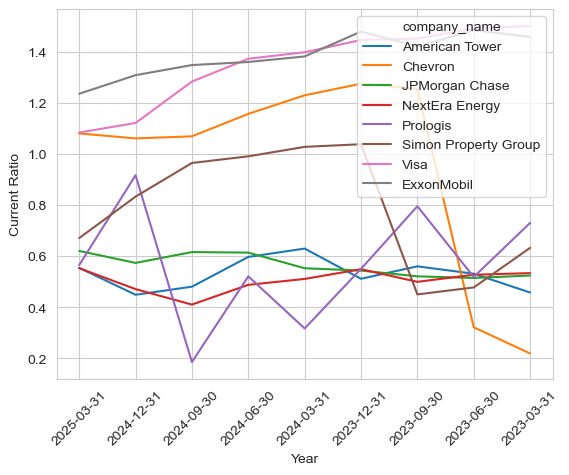

In [13]:
# Visualization

# Plotting ratios of two companies

# plt.plot(balance_sheet['sector'], balance_sheet['current_ratio'])

sns.set_style('whitegrid')
ax=sns.lineplot(data=balance_sheet, x='fiscalDateEnding', y='current_ratio', hue='company_name')
plt.xlabel("Year")
plt.ylabel('Current Ratio')
plt.xticks(rotation=45)
plt.show()

## 2.1 Income statement
Shows company's revenue and expenses over a period of time

Revenue is the money the company brings in by selling its goods and services and expenses are the costs incurred in the process. Expenses can be further broken down into: 
- Operating expenses : Operating expenses are the costs incurred to run the core operations of the business like
    - Cost of goods sold
    - Marketing expenses
    - Depreciation

- Non-operating expenses : Non-operating expenses are essentially any other expenses.
    - Interest expenses
    - Income taxes

## Income margin
### 1.Gross margin
Ratio of total reveue after taking out cost of goods sold to total revenue 
### $$Gross \ Margin= (Total \ Revenue \ - \ Cost \ of \ Goods \ Sold)/ Total \ Revenue$$
### 2.Operating margin
Ratio pf tata; revevnue after taking out operating expenses to tatal revenue
### $$ Operation \ Marging= (Total \ Revenue \ - \ Operating \ Expenses)/ Total \ Revenue$$

In [14]:
# Download income statement
income_statements=pd.read_csv('sector_income_statements.csv')

In [15]:
income_statements.head(3)

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,...,netIncomeFromContinuingOperations,comprehensiveIncomeNetOfTax,ebit,ebitda,netIncome,symbol,report_date,sector,industry,company_name
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,1928300000,2562800000,634500000.0,634500000.0,1254100000,237500000.0,...,4.986000e+08,NaN,1261700000,1.754200e+09,488700000,AMT,1970-01-01 00:00:00.000000000,Real Estate,REITs,American Tower
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,1893200000,2547600000,654400000.0,654400000.0,1080100000,243100000.0,...,1.230500e+09,NaN,1626900000,2.127800e+09,1229600000,AMT,1970-01-01 00:00:00.000000001,Real Estate,REITs,American Tower
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,1870500000,2522300000,651800000.0,651800000.0,1139200000,227700000.0,...,4.281000e+08,NaN,1211600000,1.710100e+09,-792300000,AMT,1970-01-01 00:00:00.000000002,Real Estate,REITs,American Tower


In [16]:
income_statements.columns

Index(['Unnamed: 0', 'date', 'fiscalDateEnding', 'reportedCurrency',
       'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome', 'symbol',
       'report_date', 'sector', 'industry', 'company_name'],
      dtype='object')

In [17]:
# Compute the gross margin
income_statements["gross_margin"] = (income_statements['totalRevenue'] - income_statements['costofGoodsAndServicesSold']) / income_statements['totalRevenue']

# Compute the operating margin
income_statements["operating_margin"] = (income_statements['totalRevenue']-income_statements['operatingExpenses'])/income_statements["totalRevenue"]

# Calculate mean gross margin and operating margin by industry
average_ratio = income_statements.groupby("sector")[["gross_margin","operating_margin"]].mean()

#print(average_ratio)
income_statements

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,grossProfit,totalRevenue,costOfRevenue,costofGoodsAndServicesSold,operatingIncome,sellingGeneralAndAdministrative,...,ebit,ebitda,netIncome,symbol,report_date,sector,industry,company_name,gross_margin,operating_margin
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,1928300000,2562800000,6.345000e+08,6.345000e+08,1254100000,2.375000e+08,...,1261700000,1.754200e+09,488700000,AMT,1970-01-01 00:00:00.000000000,Real Estate,REITs,American Tower,0.752419,0.736928
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,1893200000,2547600000,6.544000e+08,6.544000e+08,1080100000,2.431000e+08,...,1626900000,2.127800e+09,1229600000,AMT,1970-01-01 00:00:00.000000001,Real Estate,REITs,American Tower,0.743131,0.680837
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,1870500000,2522300000,6.518000e+08,6.518000e+08,1139200000,2.277000e+08,...,1211600000,1.710100e+09,-792300000,AMT,1970-01-01 00:00:00.000000002,Real Estate,REITs,American Tower,0.741585,0.710066
3,84,1970-01-01 00:00:00.000000003,2024-06-30,USD,1516700000,2900300000,1.383600e+09,1.383600e+09,1335900000,2.343000e+08,...,1293300000,1.855000e+09,900300000,AMT,1970-01-01 00:00:00.000000003,Real Estate,REITs,American Tower,0.522946,0.726201
4,85,1970-01-01 00:00:00.000000004,2024-03-31,USD,1496400000,2834100000,1.337700e+09,1.337700e+09,1221900000,2.570000e+08,...,1236600000,1.786000e+09,917400000,AMT,1970-01-01 00:00:00.000000004,Real Estate,REITs,American Tower,0.527998,0.903144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,2479,1970-01-01 00:00:00.000000004,2024-03-31,USD,18907000000,80411000000,6.150400e+10,6.150400e+10,11600000000,2.495000e+09,...,12590000000,1.740200e+10,8220000000,XOM,1970-01-01 00:00:00.000000004,Energy,Oil & Gas,ExxonMobil,0.235130,0.888498
68,2480,1970-01-01 00:00:00.000000005,2023-12-31,USD,17703000000,81688000000,6.398500e+10,6.398500e+10,8458000000,2.591000e+09,...,10897000000,1.863700e+10,7630000000,XOM,1970-01-01 00:00:00.000000005,Energy,Oil & Gas,ExxonMobil,0.216715,0.886825
69,2481,1970-01-01 00:00:00.000000006,2023-09-30,USD,22383000000,88570000000,6.618700e+10,6.618700e+10,11844000000,2.489000e+09,...,13868000000,1.828300e+10,9070000000,XOM,1970-01-01 00:00:00.000000006,Energy,Oil & Gas,ExxonMobil,0.252715,0.881009
70,2482,1970-01-01 00:00:00.000000007,2023-06-30,USD,20095000000,80795000000,6.070000e+10,6.070000e+10,9950000000,2.449000e+09,...,11905000000,1.614700e+10,7880000000,XOM,1970-01-01 00:00:00.000000007,Energy,Oil & Gas,ExxonMobil,0.248716,0.874435


In [18]:
# Calculate mean gross margin and operating margin by industry
average_ratio = income_statements.groupby("sector")[["gross_margin","operating_margin"]].mean()
average_ratio

,gross_margin,operating_margin
sector,,
Energy,0.383344,0.787592
Financials,0.699663,0.759046
Real Estate,0.704623,0.716347


## 2.2 Ratios from the income statement and balance sheet
### Asset turnover ratio
Measures how efficiently a company is using its assets to generate revenue
### $$ Asset \ Turnover = Total \ Revenue / Total \ Assets $$

In [19]:
# First merge the the income statements dataframe and balance sheet
merged_incom_balance= pd.merge(income_statements, balance_sheet, on=['fiscalDateEnding', 'company_name'])
merged_incom_balance.shape

(72, 86)

In [20]:
merged_incom_balance.columns

Index(['Unnamed: 0_x', 'date_x', 'fiscalDateEnding', 'reportedCurrency_x',
       'grossProfit', 'totalRevenue', 'costOfRevenue',
       'costofGoodsAndServicesSold', 'operatingIncome',
       'sellingGeneralAndAdministrative', 'researchAndDevelopment',
       'operatingExpenses', 'investmentIncomeNet', 'netInterestIncome',
       'interestIncome', 'interestExpense', 'nonInterestIncome',
       'otherNonOperatingIncome', 'depreciation',
       'depreciationAndAmortization', 'incomeBeforeTax', 'incomeTaxExpense',
       'interestAndDebtExpense', 'netIncomeFromContinuingOperations',
       'comprehensiveIncomeNetOfTax', 'ebit', 'ebitda', 'netIncome',
       'symbol_x', 'report_date_x', 'sector_x', 'industry_x', 'company_name',
       'gross_margin', 'operating_margin', 'Unnamed: 0_y', 'date_y',
       'reportedCurrency_y', 'totalAssets', 'totalCurrentAssets',
       'cashAndCashEquivalentsAtCarryingValue', 'cashAndShortTermInvestments',
       'inventory', 'currentNetReceivables', 'total

In [21]:
# Compute asset turnover ratio
merged_incom_balance['asset_turnover']=merged_incom_balance['totalRevenue']/ merged_incom_balance['totalAssets']
merged_incom_balance.shape

(72, 87)

## 2.3 Visualizing financial ratios
### Bar plots are helpful for
- visualizing financial ratios for a company
- assessing performance relative to the industry average

In [22]:
# First prepare data for plotting
# By using pivot_table() to compute the average ratio by companies
avg_company_ratio=merged_incom_balance.pivot_table(index=['sector_y', 'company_name'],
                                                  values=["gross_margin", "operating_margin", "debt_equity_ratio", "equity_multiplier_ratio"],
                                                         aggfunc='mean').reset_index()
avg_company_ratio

,sector_y,company_name,debt_equity_ratio,equity_multiplier_ratio,gross_margin,operating_margin
0,Energy,Chevron,0.694138,1.638644,0.293784,0.809544
1,Energy,ExxonMobil,0.754238,1.789198,0.237475,0.886763
2,Energy,NextEra Energy,2.550274,3.762920,0.618775,0.666470
3,Financials,JPMorgan Chase,11.148522,12.148522,0.603241,0.666120
4,Financials,Visa,1.333944,2.333944,0.796085,0.851973
5,Real Estate,American Tower,13.163095,15.769327,0.649245,0.714606
6,Real Estate,Prologis,0.662777,1.749336,0.638237,0.755372
7,Real Estate,Simon Property Group,10.214470,11.439744,0.826386,0.679064


In [23]:
# By using pivot_table() to compute the average ratio by sector
avg_sector_ratio=merged_incom_balance.pivot_table(index=['sector_y'],
                                                  values=["gross_margin", "operating_margin", "debt_equity_ratio", "equity_multiplier_ratio"],
                                                         aggfunc='mean').reset_index()
avg_sector_ratio

,sector_y,debt_equity_ratio,equity_multiplier_ratio,gross_margin,operating_margin
0,Energy,1.332883,2.396921,0.383344,0.787592
1,Financials,6.241233,7.241233,0.699663,0.759046
2,Real Estate,8.013447,9.652802,0.704623,0.716347


###
Plotting data using Seaborn requires the data to be in the so-called longitudinal format. A function of pandas called melt can help us melt wide data into longitudinal data. The id_vars argument in the function corresponds to the identifier variables or columns used when melting the DataFrame. The rest of the columns are the value variables - these are the columns we are un-pivoting.
###

In [24]:
# Melting data
molten_company=pd.melt(avg_company_ratio, id_vars=['sector_y', 'company_name'])

molten_sector=pd.melt(avg_sector_ratio, id_vars=['sector_y'])

In [25]:
molten_company.shape, molten_sector.shape

((32, 4), (12, 3))

In [26]:
print(molten_company.head(3))
print("-------------------------------------------------------")
print(molten_sector.head(3))
print("-------------------------------------------------------")

  sector_y    company_name           variable     value
0   Energy         Chevron  debt_equity_ratio  0.694138
1   Energy      ExxonMobil  debt_equity_ratio  0.754238
2   Energy  NextEra Energy  debt_equity_ratio  2.550274
-------------------------------------------------------
      sector_y           variable     value
0       Energy  debt_equity_ratio  1.332883
1   Financials  debt_equity_ratio  6.241233
2  Real Estate  debt_equity_ratio  8.013447
-------------------------------------------------------


We want to be able to plot the data in both the molten DataFrames, but Seaborn can plot data from only one DataFrame. So, we need to be able to concatenate both the DataFrames. However, recall that the molten_sector DataFrame does not have the column- company. To be able to concatenate both the molten DataFrames, both of them need to have the same columns, so we add the column company to the molten plot industry. Then, we can concatenate both the molten DataFrames using the pandas concat function.

In [27]:
# Add the column in molten_sector
molten_sector['company_name']='Industry Average'

In [28]:
# Concatenate molten_company and molten_sector
molten_plot=pd.concat([molten_company, molten_sector])
molten_plot.shape

(44, 4)

In [29]:
molten_plot=molten_plot[molten_plot['sector_y']=='Financials']

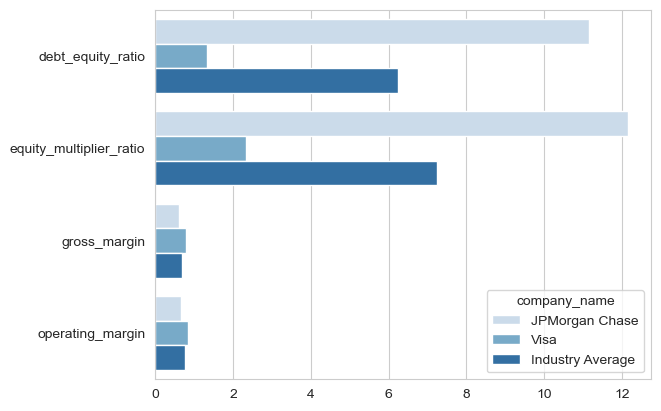

In [30]:
# Plot the bar graph
sns.barplot(data=molten_plot, x='value', y='variable', hue='company_name', palette='Blues')
plt.xlabel(''), plt.ylabel('')
plt.show()

---
## 3.1 Cash flow statement
### Accrual method of accounting
- Transaction recored in income statement when it takes place, not when cash is exchanged
### Cash flow statement
- Tells us business'cash and cash equivalents in a financial perio
- Rocords trasnactions when cash is exchanged
- Entries in cash flow statement are linked to entries of the income statemet and balance sheet
### Types of cash flow statement
- Indirect method:

Based on the accrual method of accounting - accountant starts with net income(or loss)and adjusts up or down depending on transactios done in cash
- Direct method:
Recording cash transactions when they take place
### Structure of cash flow statement
- Cash from operating activities
    - Accounts receivable
        - Customes to pay at a later date
        - Increase in accounts receivable is a cash outflow-customers bought products on credit 
    - Accounts payable
        - Increase in accounts payable in a cash inflow 
- Cash from investing activities
- Cash from financing activities
####
- Cash flow from investing activities
    - Focuses on cash generated (or lost) from investing activities of the cinoabt
    - Cash generated from investments made by the business is a cash inflow.

- Business purchases property, plant, and equipment (with cash) is a cash outflow
####
- Cash flow from financing activities
    - refers to the cash earned or spent to fund the company. If the company pays out dividends in cash, it is a cash outflow.

##
## 3.2 Financial ratios from the cash flow statement
### 1. Cash flow to net income ratio
Proportion of cash flow from operating activities to net income
### $$ Cash \ Flow \ To \ Net \ Income = Cash \ Flow \ From \ Operating \ Activities / Net \ Income $$
### 2. Operating cash flow ratio
Proportion of cash flow from operating activities to current liabilities
### $$ Operating \ Cash \ Flow = Cash \ Flow \ From \ Operating \ Activities / Current \ Liabilities $$

In [31]:
# Download cash flow dataframe
cash_flow=pd.read_csv('sector_cash_flows.csv')
cash_flow.head(3)

,Unnamed: 0,date,fiscalDateEnding,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,...,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome,symbol,report_date,sector,industry,company_name
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,1.295000e+09,NaN,NaN,NaN,NaN,492500000.0,...,NaN,NaN,NaN,NaN,498600000,AMT,1970-01-01 00:00:00.000000000,Real Estate,REITs,American Tower
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,1.199000e+09,NaN,NaN,NaN,NaN,500900000.0,...,NaN,NaN,NaN,NaN,1230500000,AMT,1970-01-01 00:00:00.000000001,Real Estate,REITs,American Tower
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,1.469400e+09,NaN,NaN,NaN,NaN,512800000.0,...,NaN,NaN,NaN,NaN,-780400000,AMT,1970-01-01 00:00:00.000000002,Real Estate,REITs,American Tower


In [32]:
cash_flow.shape, cash_flow.columns

((72, 36),
 Index(['Unnamed: 0', 'date', 'fiscalDateEnding', 'reportedCurrency',
        'operatingCashflow', 'paymentsForOperatingActivities',
        'proceedsFromOperatingActivities', 'changeInOperatingLiabilities',
        'changeInOperatingAssets', 'depreciationDepletionAndAmortization',
        'capitalExpenditures', 'changeInReceivables', 'changeInInventory',
        'profitLoss', 'cashflowFromInvestment', 'cashflowFromFinancing',
        'proceedsFromRepaymentsOfShortTermDebt',
        'paymentsForRepurchaseOfCommonStock', 'paymentsForRepurchaseOfEquity',
        'paymentsForRepurchaseOfPreferredStock', 'dividendPayout',
        'dividendPayoutCommonStock', 'dividendPayoutPreferredStock',
        'proceedsFromIssuanceOfCommonStock',
        'proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet',
        'proceedsFromIssuanceOfPreferredStock',
        'proceedsFromRepurchaseOfEquity', 'proceedsFromSaleOfTreasuryStock',
        'changeInCashAndCashEquivalents', 'changeInExch

In [33]:
cash_flow['cashflow_income']=cash_flow['operatingCashflow']/cash_flow['netIncome']

In [34]:
# Merged the cash flow and balance sheet dataframes
merged_cash_balance=pd.merge(cash_flow, balance_sheet, on=['fiscalDateEnding', 'company_name'])
merged_cash_balance.shape

(72, 88)

In [35]:
# merged_cash_balance.columns

In [36]:
merged_cash_balance['operating_cashflow']= merged_cash_balance['operatingCashflow']/merged_cash_balance['totalCurrentLiabilities']

In [37]:
merged_cash_balance.shape

(72, 89)

In [38]:
merged_cash_balance.head(3)

,Unnamed: 0_x,date_x,fiscalDateEnding,reportedCurrency_x,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,...,industry_y,current_ratio,debt_equity_ratio,equity_multiplier_ratio,debt_assets_ratio,sector_current_ratio,sector_debt_equity_ratio,sector_equity_multiplier_ratio,sector_debt_assets_ratio,operating_cashflow
0,81,1970-01-01 00:00:00.000000000,2025-03-31,USD,1.295000e+09,NaN,NaN,NaN,NaN,492500000.0,...,REITs,0.554587,14.744625,17.555618,0.839881,0.596933,8.891143,10.608227,0.711450,0.204840
1,82,1970-01-01 00:00:00.000000001,2024-12-31,USD,1.199000e+09,NaN,NaN,NaN,NaN,500900000.0,...,REITs,0.449262,15.205695,18.058483,0.842025,0.733138,8.559265,10.280188,0.705354,0.169456
2,83,1970-01-01 00:00:00.000000002,2024-09-30,USD,1.469400e+09,NaN,NaN,NaN,NaN,512800000.0,...,REITs,0.480883,14.450367,17.249307,0.837736,0.543913,8.737055,10.440378,0.712212,0.207851


In [39]:
average_ratios=merged_cash_balance.pivot_table(index='fiscalDateEnding', values=['cashflow_income', 'operating_cashflow'])

In [40]:
average_ratios

,cashflow_income,operating_cashflow
fiscalDateEnding,,
2023-03-31,0.068583,0.218928
2023-06-30,1.199890,0.229083
2023-09-30,2.222419,0.305315
2023-12-31,4.278868,0.208124
2024-03-31,-0.236856,0.186187
2024-06-30,1.596980,0.217883
2024-09-30,0.435897,0.201011
2024-12-31,2.692636,0.213215
2025-03-31,-0.121470,0.189986


## 3.3 Visualizing financial ratios for comparison 
### we will use
molten_company, molten_sector, molten_plot
### $sns.relplot()$

In [41]:
# merged_cash_balance.info()

In [42]:
rel_cb=merged_cash_balance.iloc[:,[2, 31, 33, 35, 36, 88]]
rel_cb.head(2)

,fiscalDateEnding,symbol_x,sector_x,company_name,cashflow_income,operating_cashflow
0,2025-03-31,AMT,Real Estate,American Tower,2.597272,0.204840
1,2024-12-31,AMT,Real Estate,American Tower,0.974401,0.169456


In [43]:
rel_cb=rel_cb[rel_cb['sector_x']=='Real Estate']
rel_cb.head()

,fiscalDateEnding,symbol_x,sector_x,company_name,cashflow_income,operating_cashflow
0,2025-03-31,AMT,Real Estate,American Tower,2.597272,0.204840
1,2024-12-31,AMT,Real Estate,American Tower,0.974401,0.169456
2,2024-09-30,AMT,Real Estate,American Tower,-1.882881,0.207851
3,2024-06-30,AMT,Real Estate,American Tower,1.486727,0.194304
4,2024-03-31,AMT,Real Estate,American Tower,1.399172,0.190734


In [44]:
rel_cb_plot=rel_cb.melt(id_vars=['fiscalDateEnding', 'company_name'], value_vars=['cashflow_income', 'operating_cashflow'], var_name='Ratio')
rel_cb_plot.head(2)

,fiscalDateEnding,company_name,Ratio,value
0,2025-03-31,American Tower,cashflow_income,2.597272
1,2024-12-31,American Tower,cashflow_income,0.974401


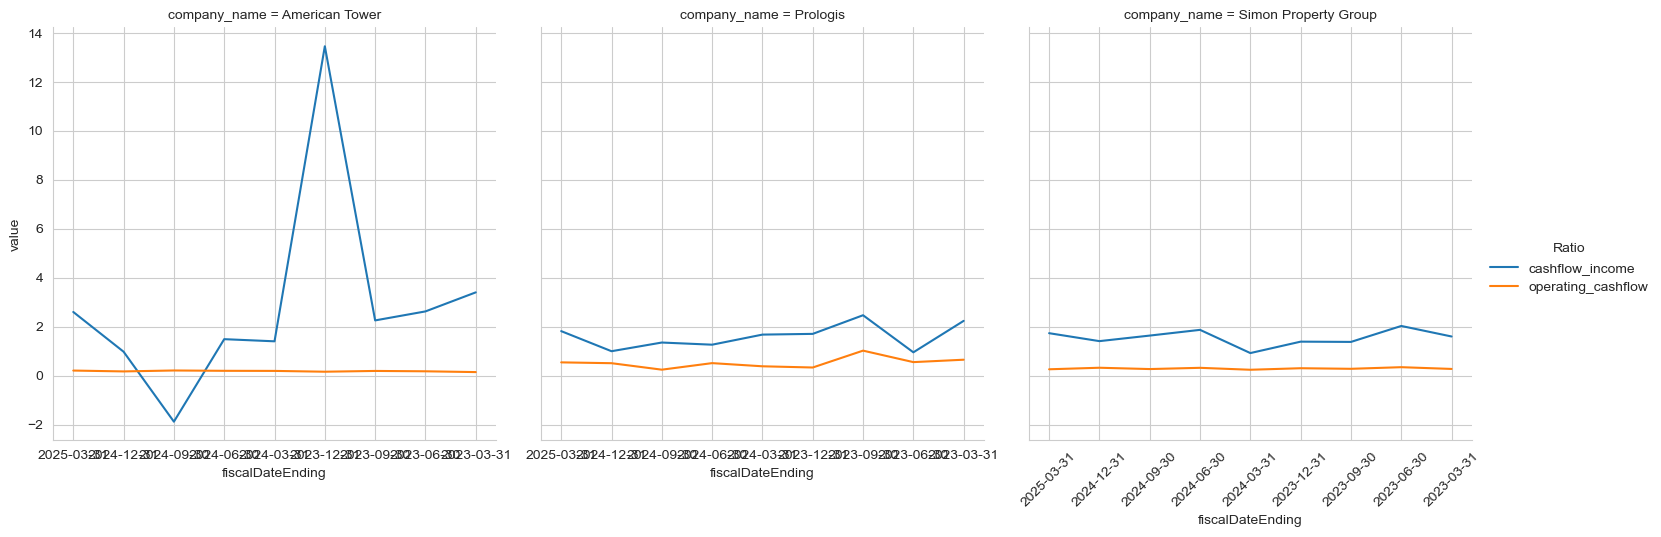

In [45]:
sns.relplot(data=rel_cb_plot, x='fiscalDateEnding', y='value', col='company_name', kind='line', hue='Ratio')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Example 2 - relplot()
# merged_incom_balance.info()

In [47]:
rel_ib=merged_incom_balance.iloc[:, [2, 28, 30, 32, 33, 34]]

In [48]:
rel_ib_mel=rel_ib.melt(id_vars= ['fiscalDateEnding', 'company_name'], value_vars=['gross_margin', 'operating_margin'],
                      var_name='Ratio')
rel_ib_mel.head(2)

,fiscalDateEnding,company_name,Ratio,value
0,2025-03-31,American Tower,gross_margin,0.752419
1,2024-12-31,American Tower,gross_margin,0.743131


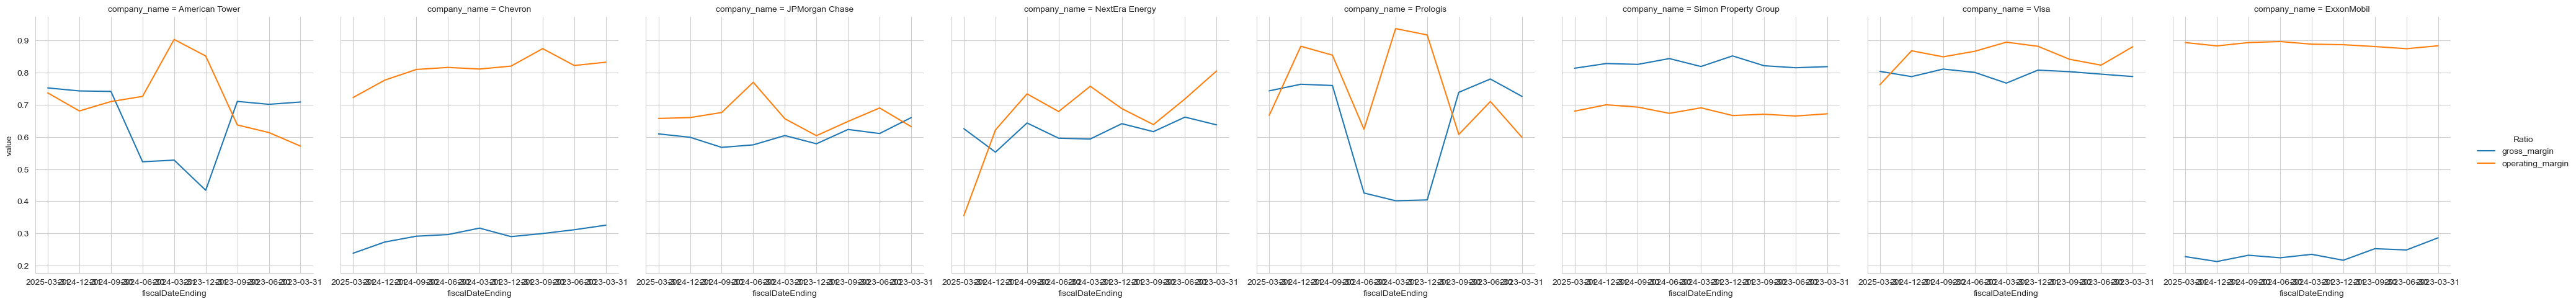

In [49]:
sns.relplot(data=rel_ib_mel, x='fiscalDateEnding', y='value', col='company_name', kind='line', hue='Ratio')
plt.show()

##
## 4.1 glimpse into financial ratios
we will go over some of the average financial ratios of companies in the tech, real estate, and fast-moving consumer goods industries, which we'll call FMCG. We will see that the average ratios varies by industry and learn what drives these differences.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
balance_sheet=pd.read_csv('all_balance_sheets.csv')
sector=pd.read_csv("top_companies_by_sector.csv")
balance_sheet.shape, sector.shape
balance_sheet=pd.merge(balance_sheet, sector, on='symbol', how='left').copy()

balance_sheet['current_ratio']=balance_sheet['totalCurrentAssets']/balance_sheet['totalCurrentLiabilities']
balance_sheet['debt_equity_ratio']=balance_sheet['totalLiabilities']/balance_sheet['totalShareholderEquity']

balance_sheet['average_current_ratio']=balance_sheet.groupby(['sector'])['current_ratio'].transform('mean')
balance_sheet['average_debt_equity_ratio']=balance_sheet.groupby(['sector'])['debt_equity_ratio'].transform('mean')

balance_sheet_2025=balance_sheet[balance_sheet['fiscalDateEnding']>='2025-02-01'].sort_values('sector')

In [52]:
balance_sheet.pivot_table(index='sector', values='current_ratio', aggfunc=('mean'))

,current_ratio
sector,
Communication Services,4.371022
Consumer Discretionary,1.350289
Consumer Staples,0.935174
Energy,1.000457
Financials,4.775253
Health Care,1.404311
Industrials,1.273598
Information Technology,2.884007
Materials,1.490997


In [53]:
balance_sheet.pivot_table(index='sector', values='debt_equity_ratio', aggfunc=('mean'))

,debt_equity_ratio
sector,
Communication Services,0.516461
Consumer Discretionary,7.488214
Consumer Staples,1.747704
Energy,1.438283
Financials,4.283881
Health Care,1.975510
Industrials,16.522250
Information Technology,1.171088
Materials,2.538049


###
### Average current ratio
Recall that the current ratio is current assets divided by current liabilities. We can get the average current ratio grouped by industry using pivot_table(), Notice that the average current ratio of Consumer  companies is lower compared to the Technology and real estate companies. Now, the ideal current ratio is between one and three; however, it is not uncommon to see Consumer companies with a low current ratio. This is because some Consumer companies purchase lots of raw materials on credit, pushing up their current liabilities. Some Consumer companies are also very efficient, resulting in low inventory; that is, they sell off their goods fast, causing their current assets to be low, resulting in a low current ratio.
###
### Average debt-to-equity ratio

Recall that debt-to-equity ratio is the total liabilities divided by the total shareholders' equity. We can use the code provided here to get the average debt-to-equity ratio per industry. Notice that the debt-to-equity ratio of real estate, industrials, and financial companies is much higher than the others. This is because real estate and other companies invest huge amounts of money into buying real estate, equipments, and they usually fund these purchases with loans, pushing up their total liabilities. A high debt-to-equity ratio is common in companies that invest heavily in fixed assets which are long-term assets that cannot be liquidated easily. A high debt-to-equity ratio is not necessarily bad if the company is bringing in enough money to pay off its debt.
###

In [54]:
balance_sheet_2025.head(2)

,date,fiscalDateEnding,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,...,commonStockSharesOutstanding,symbol,report_date,sector,industry,company_name,current_ratio,debt_equity_ratio,average_current_ratio,average_debt_equity_ratio
780,1970-01-01 00:00:00.000000000,2025-03-31,USD,4.753740e+11,1.620520e+11,2.326400e+10,2.326400e+10,NaN,5.100000e+10,3.133220e+11,...,1.229100e+10,GOOGL,1970-01-01 00:00:00.000000000,Communication Services,Internet Services,Alphabet,1.768084,0.376830,4.371022,0.516461
1428,1970-01-01 00:00:00.000000000,2025-03-31,USD,2.802130e+11,9.022700e+10,2.875000e+10,2.875000e+10,NaN,1.451400e+10,1.899860e+11,...,2.590000e+09,META,1970-01-01 00:00:00.000000000,Communication Services,Social Media,Meta,2.662349,0.514427,4.371022,0.516461


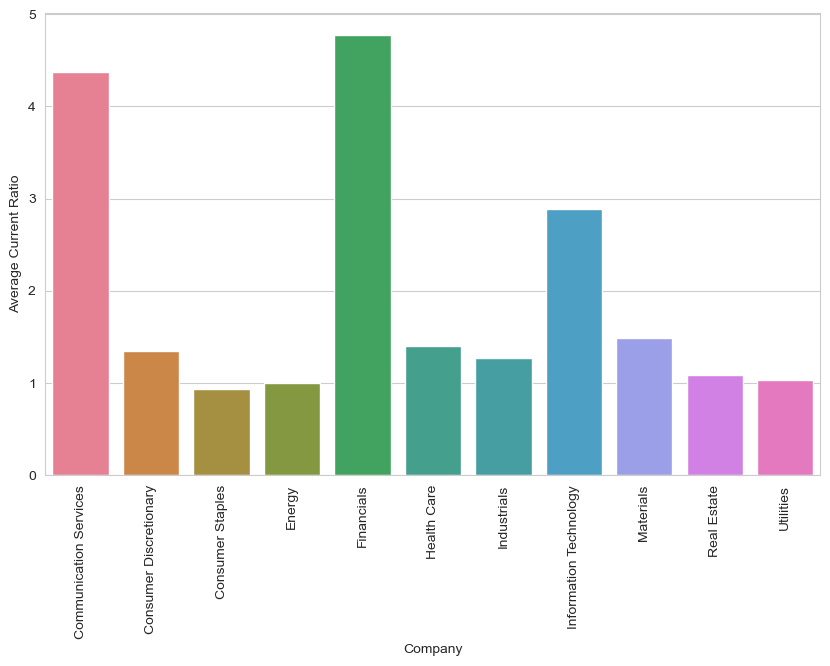

In [55]:
fig=plt.figure(figsize=(10,6))
sns.barplot(data=balance_sheet_2025, x='sector', y='average_current_ratio', hue='sector')
plt.ylabel('Average Current Ratio'), plt.xlabel('Company')
plt.xticks(rotation=90)
plt.show()

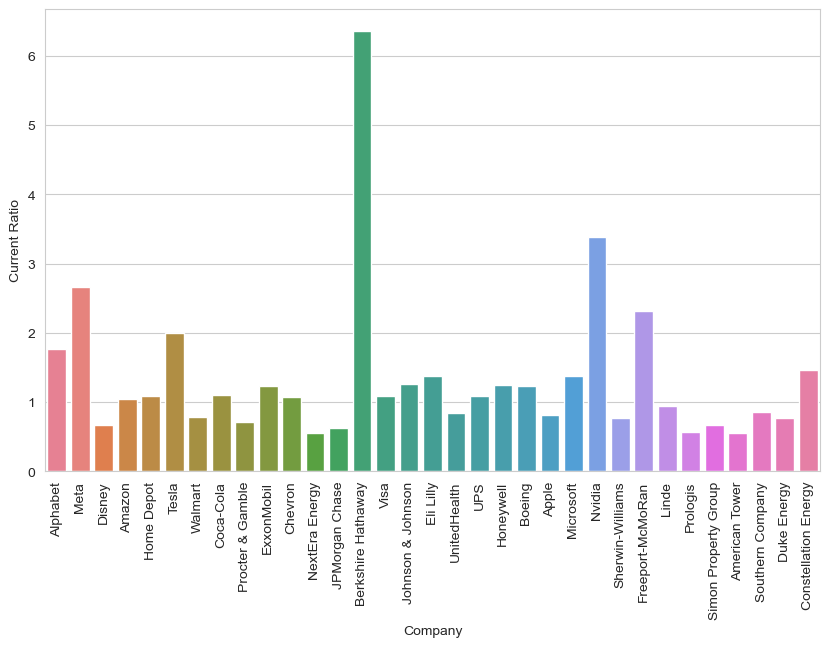

In [56]:
fig=plt.figure(figsize=(10,6))
sns.barplot(data=balance_sheet_2025, x='company_name', y='current_ratio', hue='company_name')
plt.ylabel('Current Ratio'), plt.xlabel('Company')
plt.xticks(rotation=90)
plt.show()

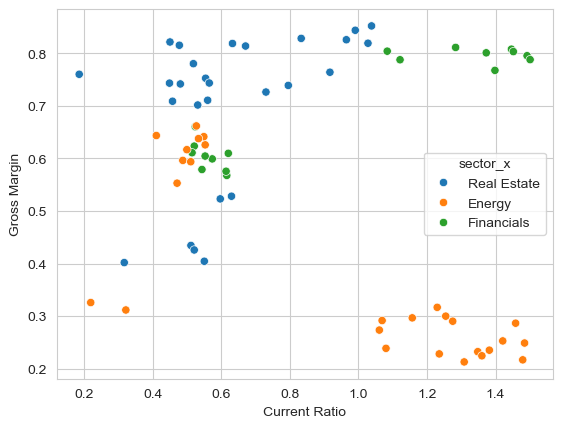

In [57]:
# High current ratio leads to high profitability
# income_statements
sns.scatterplot(data=merged_incom_balance, x='current_ratio', y='gross_margin', hue='sector_x')
plt.xlabel('Current Ratio'), plt.ylabel('Gross Margin')
plt.show()

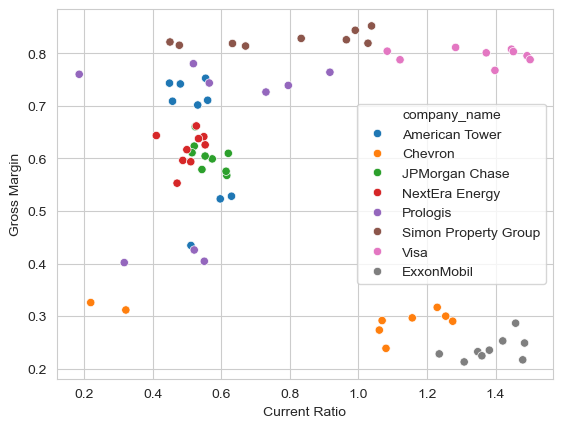

In [58]:
sns.scatterplot(data=merged_incom_balance, x='current_ratio', y='gross_margin', hue='company_name')
plt.xlabel('Current Ratio'), plt.ylabel('Gross Margin')
plt.show()

### Fit Line


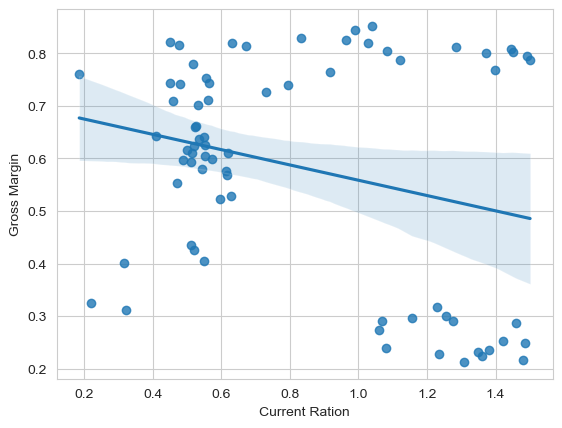

In [59]:
# Fit-Line. Adding a line that best fits the points of this plot can help us discern the relationship
sns.regplot(data=merged_incom_balance, x='current_ratio', y='gross_margin')
plt.xlabel('Current Ration'), plt.ylabel('Gross Margin')
plt.show()

###
### 4.3 Heat Map 
Heat map and can be used to show correlations between different financial ratios. Each rectangular block in the plot has a color representing the correlation between the ratios on their respective axe


In [60]:
corr_matrix=merged_incom_balance[['current_ratio', 'debt_equity_ratio', 'equity_multiplier_ratio', 'debt_assets_ratio', 'gross_margin', 'operating_margin']].corr()
corr_matrix

,current_ratio,debt_equity_ratio,equity_multiplier_ratio,debt_assets_ratio,gross_margin,operating_margin
current_ratio,1.000000,-0.453984,-0.456914,-0.422970,-0.266973,0.552664
debt_equity_ratio,-0.453984,1.000000,0.997016,0.859185,0.406160,-0.458758
equity_multiplier_ratio,-0.456914,0.997016,1.000000,0.833207,0.399599,-0.447318
debt_assets_ratio,-0.422970,0.859185,0.833207,1.000000,0.502867,-0.509201
gross_margin,-0.266973,0.406160,0.399599,0.502867,1.000000,-0.431164
operating_margin,0.552664,-0.458758,-0.447318,-0.509201,-0.431164,1.000000


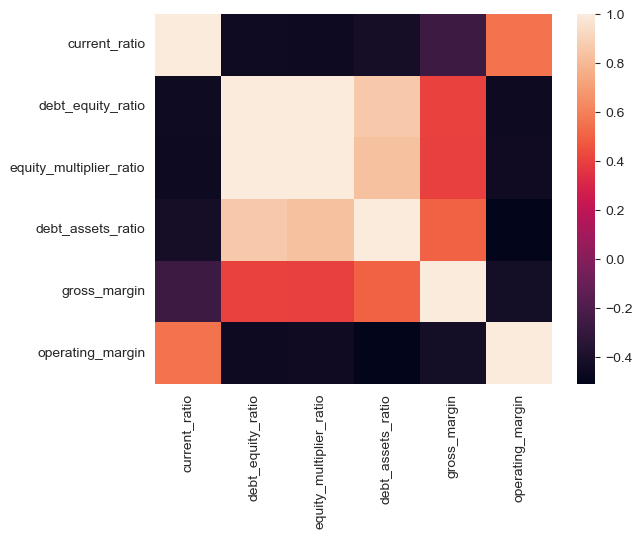

In [61]:
sns.heatmap(corr_matrix)
plt.show()

In [62]:
merged_incom_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 87 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0_x                            72 non-null     int64  
 1   date_x                                  72 non-null     object 
 2   fiscalDateEnding                        72 non-null     object 
 3   reportedCurrency_x                      72 non-null     object 
 4   grossProfit                             72 non-null     int64  
 5   totalRevenue                            72 non-null     int64  
 6   costOfRevenue                           72 non-null     float64
 7   costofGoodsAndServicesSold              72 non-null     float64
 8   operatingIncome                         72 non-null     int64  
 9   sellingGeneralAndAdministrative         65 non-null     float64
 10  researchAndDevelopment                  3 non-null      float64


In [63]:
# Multifaceted bar cgart
rel_cb=merged_incom_balance.loc[:,['fiscalDateEnding', 'sector_x', 'sector_current_ratio', 'sector_debt_equity_ratio', 'sector_equity_multiplier_ratio', 'sector_debt_assets_ratio']]
rel_cb

,fiscalDateEnding,sector_x,sector_current_ratio,sector_debt_equity_ratio,sector_equity_multiplier_ratio,sector_debt_assets_ratio
0,2025-03-31,Real Estate,0.596933,8.891143,10.608227,0.711450
1,2024-12-31,Real Estate,0.733138,8.559265,10.280188,0.705354
2,2024-09-30,Real Estate,0.543913,8.737055,10.440378,0.712212
3,2024-06-30,Real Estate,0.703159,8.385169,10.054196,0.704988
4,2024-03-31,Real Estate,0.658408,8.047980,9.691899,0.703017
...,...,...,...,...,...,...
67,2024-03-31,Energy,1.040911,1.298356,2.389922,0.494445
68,2023-12-31,Energy,1.101135,1.313758,2.400692,0.496941
69,2023-09-30,Energy,1.058427,1.286674,2.368775,0.494365
70,2023-06-30,Energy,0.778002,1.639351,2.390646,0.702337


In [64]:
mel_rel_cb=rel_cb.melt(id_vars=['fiscalDateEnding', 'sector_x'], value_vars=['sector_current_ratio', 'sector_debt_equity_ratio', 'sector_equity_multiplier_ratio', 'sector_debt_assets_ratio'], var_name="Ratio")

In [65]:
mel_rel_cb

,fiscalDateEnding,sector_x,Ratio,value
0,2025-03-31,Real Estate,sector_current_ratio,0.596933
1,2024-12-31,Real Estate,sector_current_ratio,0.733138
2,2024-09-30,Real Estate,sector_current_ratio,0.543913
3,2024-06-30,Real Estate,sector_current_ratio,0.703159
4,2024-03-31,Real Estate,sector_current_ratio,0.658408
...,...,...,...,...
283,2024-03-31,Energy,sector_debt_assets_ratio,0.494445
284,2023-12-31,Energy,sector_debt_assets_ratio,0.496941
285,2023-09-30,Energy,sector_debt_assets_ratio,0.494365
286,2023-06-30,Energy,sector_debt_assets_ratio,0.702337


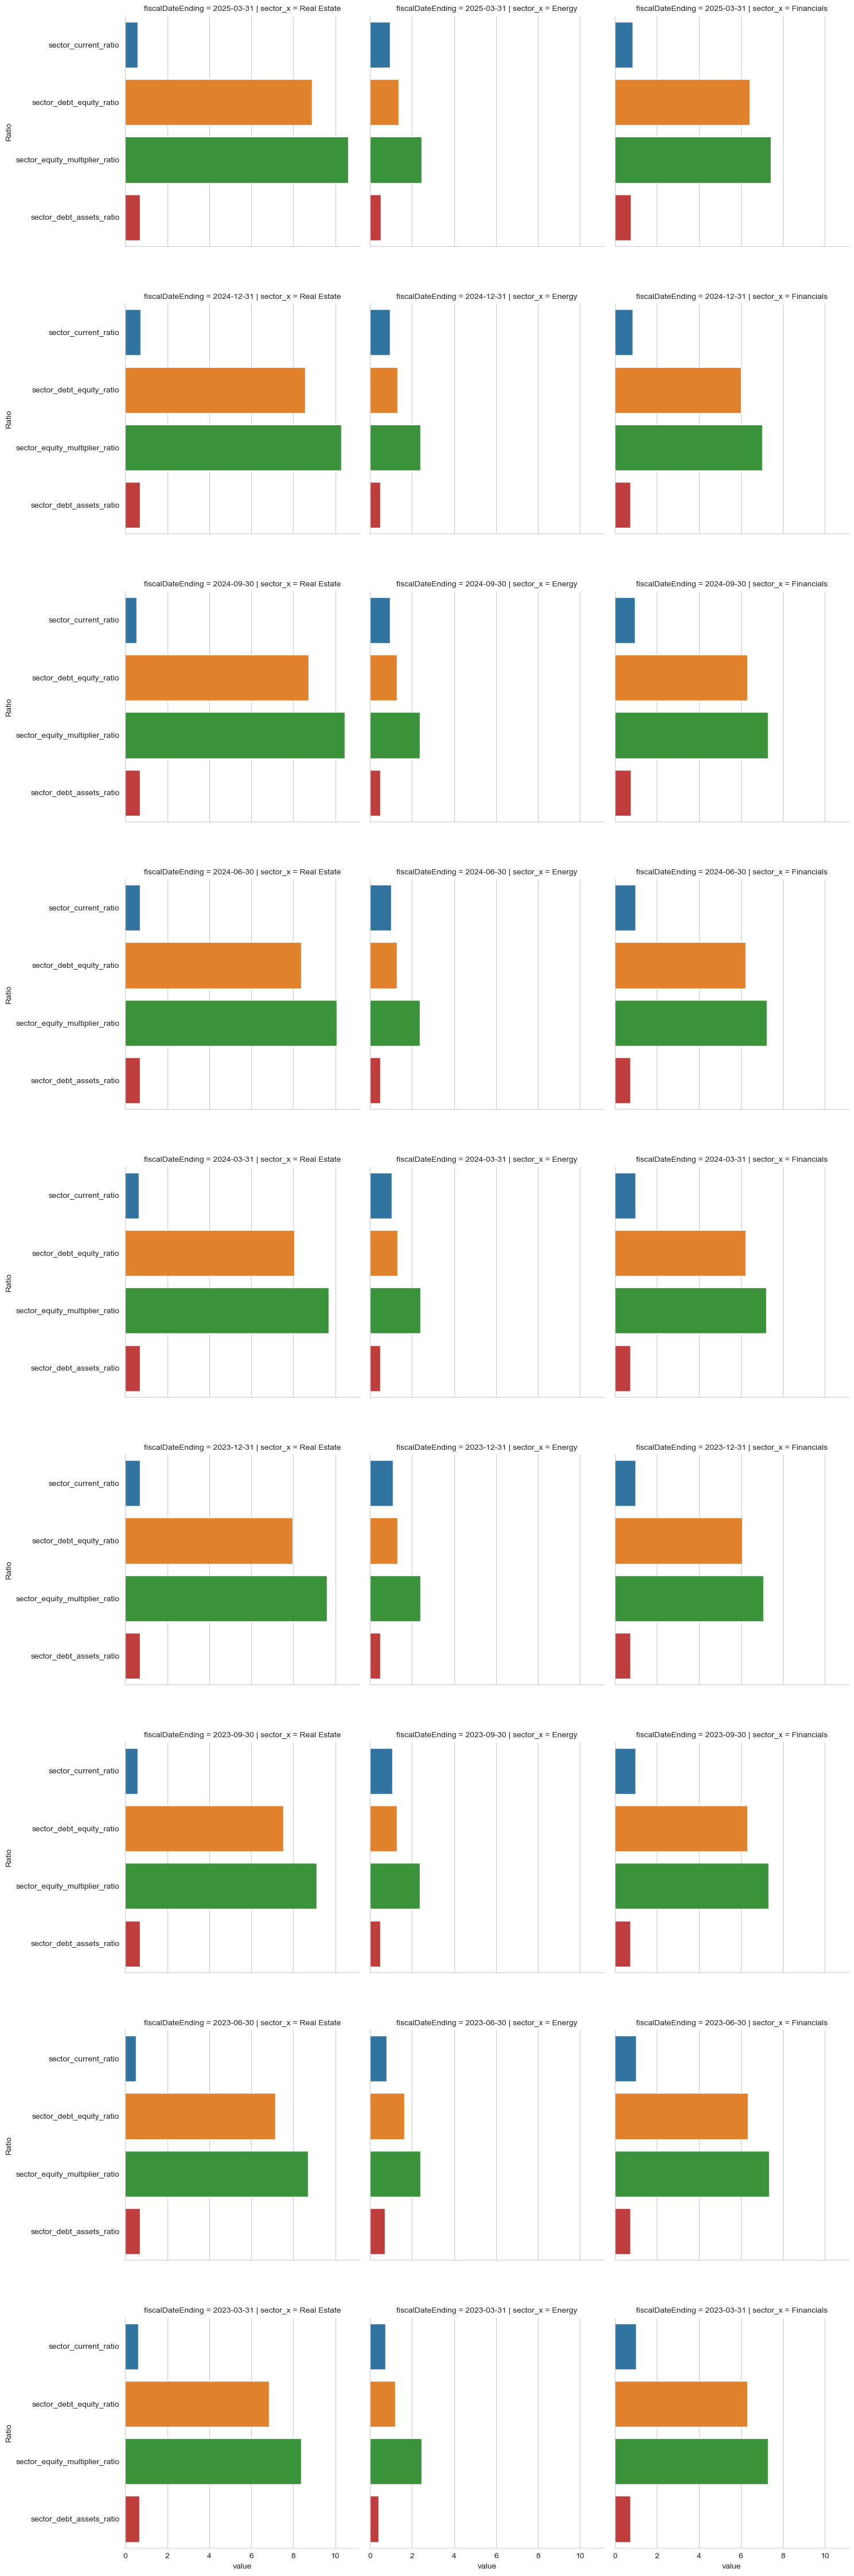

In [66]:
sns.catplot(data=mel_rel_cb, x='value', y='Ratio', row='fiscalDateEnding', col='sector_x', kind='bar', hue='Ratio')
plt.subplots_adjust(hspace=0.25)
plt.show()